In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
sonar = pd.read_csv('minevsrock.csv')

In [3]:
sonar.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [4]:
sonar.shape

(206, 61)

In [5]:
sonar.describe()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
count,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,...,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000
mean,0.028854,0.038227,0.043770,0.054011,0.075161,0.104462,0.121702,0.134463,0.177640,0.208592,...,0.015625,0.013193,0.010628,0.010820,0.009223,0.008178,0.007723,0.007882,0.007865,0.006503
std,0.022523,0.032973,0.038603,0.046693,0.055799,0.059359,0.062027,0.085493,0.118531,0.134977,...,0.010511,0.008774,0.006935,0.007193,0.007033,0.005733,0.005728,0.006433,0.006124,0.005042
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013250,0.016350,0.018850,0.024425,0.037350,0.066875,0.080300,0.080275,0.096475,0.111025,...,0.008275,0.007325,0.005025,0.005325,0.004050,0.004400,0.003700,0.003600,0.003625,0.003100
50%,0.022800,0.030400,0.034150,0.044050,0.061850,0.091350,0.106950,0.111800,0.152250,0.182400,...,0.013750,0.011400,0.009550,0.009300,0.007500,0.006800,0.005850,0.005750,0.006250,0.005300
75%,0.035275,0.047775,0.058350,0.066900,0.101825,0.134175,0.153675,0.169350,0.232150,0.269300,...,0.020600,0.016700,0.014850,0.014350,0.012100,0.010425,0.010250,0.010275,0.010175,0.008500
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.079800,0.045900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [6]:
sonar.columns[60]

'R'

In [7]:
a=sonar.iloc[:,60]
sonar.groupby(a).mean()

C:\Users\Surya Reddy\AppData\Local\Temp\ipykernel_16340\1848086425.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sonar.groupby(a).mean()


,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
R,,,,,,,,,,,,,,,,,,,,,
M,0.034379,0.045204,0.050656,0.064786,0.086926,0.111674,0.128627,0.149570,0.214343,0.252059,...,0.018615,0.015515,0.011461,0.012015,0.009784,0.008915,0.007735,0.008948,0.008568,0.006896
R,0.022524,0.030232,0.035879,0.041664,0.061680,0.096199,0.113767,0.117153,0.135584,0.158785,...,0.012198,0.010533,0.009673,0.009451,0.008581,0.007333,0.007708,0.006659,0.007058,0.006053


In [8]:
sonar.iloc[:,60].value_counts()

M    110
R     96
Name: R, dtype: int64

In [9]:
x = sonar.iloc[:,:60]
y = sonar.iloc[:,60]

In [10]:
x

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
202,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
203,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
204,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1 ,random_state=3)

In [12]:
model = LogisticRegression()

In [13]:
model.fit(x_train,y_train)

LogisticRegression()

# Model Evaluation

In [14]:
x_train_pred = model.predict(x_train)
traning_data_accuracy = accuracy_score(x_train_pred,y_train)

In [15]:
traning_data_accuracy

0.827027027027027

In [16]:
x_test_pred = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_pred,y_test)

In [17]:
test_data_accuracy

0.7619047619047619

In [18]:
input_data = (0.1021,0.0830,0.0577,0.0627,0.0635,0.1328,0.0988,0.1787
              ,0.1199,0.1369,0.2509,0.2631,0.2796,0.2977,0.3823,0.3129,0.3956,
              0.2093,0.3218,0.3345,0.3184,0.2887,0.3610,0.2566,0.4106,0.4591,
              0.4722,0.7278,0.7591,0.6579,0.7514,0.6666,0.4903,0.5962,0.6552,
              0.4014,0.1188,0.3245,0.3107,0.1354,0.5109,0.7988,0.7517,0.5508,
              0.5858,0.7292,0.5522,0.3339,0.1608,0.0475,0.1004,0.0709,0.0317,
              0.0309,0.0252,0.0087,0.0177,0.0214,0.0227,0.0106)

#changing input data into numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

['M']


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [19]:
input_data_as_numpy_array.reshape(1,-1)

array([[0.1021, 0.083 , 0.0577, 0.0627, 0.0635, 0.1328, 0.0988, 0.1787,
        0.1199, 0.1369, 0.2509, 0.2631, 0.2796, 0.2977, 0.3823, 0.3129,
        0.3956, 0.2093, 0.3218, 0.3345, 0.3184, 0.2887, 0.361 , 0.2566,
        0.4106, 0.4591, 0.4722, 0.7278, 0.7591, 0.6579, 0.7514, 0.6666,
        0.4903, 0.5962, 0.6552, 0.4014, 0.1188, 0.3245, 0.3107, 0.1354,
        0.5109, 0.7988, 0.7517, 0.5508, 0.5858, 0.7292, 0.5522, 0.3339,
        0.1608, 0.0475, 0.1004, 0.0709, 0.0317, 0.0309, 0.0252, 0.0087,
        0.0177, 0.0214, 0.0227, 0.0106]])

In [20]:
x = [123,456,789]

In [21]:
#y for i in range(len(x)) list(x[i]) for j in range(len(x)) int(y[i]) =  str x[j] + int y[i]  
lst = [sum(list(map(int,str(i)))) for i in x]
print(lst)

[6, 15, 24]


In [22]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state=0)
lg.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [23]:
y_pred = lg.predict(x_test)

In [24]:
#confusion matrix evaluation
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[11,  4],
       [ 1,  5]], dtype=int64)

In [25]:
11+4+1+5

21

In [26]:
((11+5)/21)*100

76.19047619047619

In [27]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1,x2 = x_set, y_set
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha =0.75,cmap =ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0],x_set[y_set == j,1],
               c = ListedColormap(('red','green'))(i),label = j)
plt.title('Logistic regression')
plt.show()

NameError: name 'classifier' is not defined

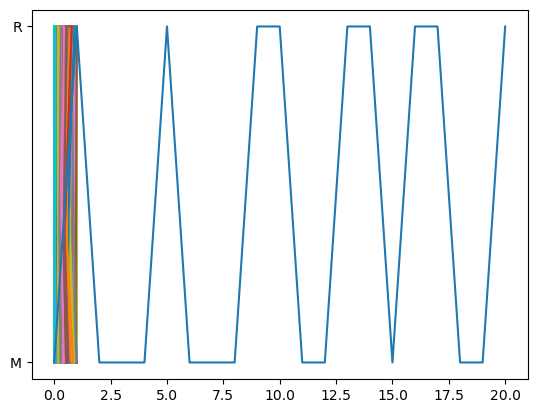

In [33]:
plt.plot(x_train, y_train)
plt.plot(y_pred)
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(x_train,y_test,color ='red', linewidth=3)
plt.plot(x_test,y_pred,color ='red', linewidth=3)